# Decision Tree

## An implementation of Decision Tree using numpy and pandas

### Decistion Tree procedures:
1. Data preparation
2. Decision Tree implementation
3. Making predictions
4. Comparing with built-in packages in sklearn

## 1. Data Preparation

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [2]:
# Read in data and display the first 10 rows
data = pd.read_csv("titanic.csv")
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
# Remove columns that are not used and display cleaned data
columns_to_drop = ["PassengerId","Name","Ticket","Cabin","Embarked"]
data_clean = data.drop(columns_to_drop,axis=1)
data_clean

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000
887,1,1,female,19.0,0,0,30.0000
888,0,3,female,NaN,1,2,23.4500
889,1,1,male,26.0,0,0,30.0000


In [4]:
# Normalize labels and transform label to normalized encoding.
le = LabelEncoder()
data_clean["Sex"] = le.fit_transform(data_clean["Sex"])

In [5]:
# Fill in NaN values with median value
data_clean = data_clean.fillna(data_clean["Age"].median())

In [6]:
X = data_clean.iloc[:,1:]
Y = data_clean.iloc[:,:1]

`Entropy is nothing but the measure of purity`
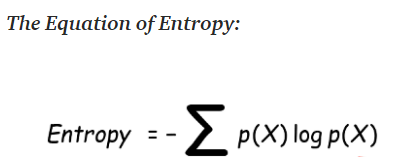
Source: https://medium.com/coinmonks/what-is-entropy-and-why-information-gain-is-matter-4e85d46d2f01

In [7]:
def entropy(col):
    counts = np.unique(col,return_counts=True)
    N = float(col.shape[0])
    entropy = 0.0
    
    for ix in counts[1]:
        p = ix/N
        entropy += -1*p*np.log2(p)
        
    return entropy

In [8]:
arr = np.array([1,0,1,1,0,0])
entropy(arr)

1.0

In [9]:
def divide_data(x_data,fkey,fval):
    
    x_right = pd.DataFrame([],columns=x_data.columns)
    x_left = pd.DataFrame([],columns=x_data.columns)
    
    for ix in range(x_data.shape[0]):
        val = x_data[fkey].loc[ix]
        
        if val>fval:
            x_right = x_right.append(x_data.loc[ix])
        else :
            x_left = x_left.append(x_data.loc[ix])
            
    return x_left,x_right

`Information gain (IG) measures how much “information” a feature gives us about the class.
The formula:
Information gain = entropy(parent) - weights average * entropy(children)`

In [10]:
def information_gain(x_data,fkey,fval):
    left,right = divide_data(x_data,fkey,fval)
    
    l = float(left.shape[0])/x_data.shape[0]
    r = float(right.shape[0])/x_data.shape[0]
    if left.shape[0] == 0 or right.shape[0] == 0:
        return -100
    
    ig = entropy(x_data.Survived) - (l*entropy(left.Survived)+r*entropy(right.Survived))
    return ig

In [11]:
for fx in X.columns:
    print(fx)
    print(information_gain(data_clean,fx,data_clean[fx].mean()))

Pclass
0.07579362743608165
Sex
0.2176601066606142
Age
0.0008836151229467681
SibSp
0.009584541813400071
Parch
0.015380754493137694
Fare
0.042140692838995464


## 2. Decision Tree Implementation

In [12]:
class DecisionTree:
    def __init__(self,depth=0,max_depth=5):
        self.left = None
        self.right = None
        self.fkey = None
        self.fval = None
        self.max_depth = max_depth
        self.depth = depth
        self.target = None
    
    def train(self,x_train):
        features = ['Pclass',"Sex","Age","SibSp","Parch","Fare"]
        info_gains = []
        for ix in features :
            i_gain = information_gain(x_train,ix,x_train[ix].mean())
            info_gains.append(i_gain)
            
        self.fkey = features[np.argmax(info_gains)]
        self.fval = x_train[self.fkey].mean()
        
        data_left,data_right = divide_data(x_train,self.fkey,self.fval)
        data_left = data_left.reset_index(drop=True)
        data_right = data_right.reset_index(drop=True)
        
        print("Making Tree with Feature ",self.fkey)
        
        if data_left.shape[0] == 0 or data_right.shape[0] ==0:
            if x_train.Survived.mean() >=0.5:
                self.target = "Survive"
            else :
                self.target = "Dead"
                
            return 
        
        if self.depth >= self.max_depth :
            if x_train.Survived.mean() >=0.5:
                self.target = "Survive"
            else :
                self.target = "Dead"
                
            return 
          
        self.left = DecisionTree(depth=self.depth+1,max_depth = self.max_depth)
        self.left.train(data_left)
        
        self.right = DecisionTree(depth=self.depth+1,max_depth = self.max_depth)
        self.right.train(data_right)
        
        if x_train.Survived.mean() >=0.5:
            self.target = "Survive"
        else :
            self.target = "Dead"
        return 
        
    def predict(self,test):
        
        if test[self.fkey] > self.fval:
            
            if self.right is None:
                return self.target
            return self.right.predict(test)
        
        else:
            if self.left is None:
                return self.target
            return self.left.predict(test)

In [13]:
d = DecisionTree()

## 3. Making Predictions

In [14]:
split = int(0.7*data_clean.shape[0])
train_data = data_clean[:split]
test_data = data_clean[split:]
test_data = test_data.reset_index(drop=True)

In [15]:
train_data.shape[0]

623

In [16]:
test_data.shape[0]

268

In [17]:
d.train(train_data)

Making Tree with Feature  Sex
Making Tree with Feature  Pclass
Making Tree with Feature  Age
Making Tree with Feature  SibSp
Making Tree with Feature  Pclass
Making Tree with Feature  Age
Making Tree with Feature  Age
Making Tree with Feature  SibSp
Making Tree with Feature  Parch
Making Tree with Feature  Pclass
Making Tree with Feature  SibSp
Making Tree with Feature  Fare
Making Tree with Feature  Parch
Making Tree with Feature  Age
Making Tree with Feature  Pclass
Making Tree with Feature  Age
Making Tree with Feature  Age
Making Tree with Feature  Parch
Making Tree with Feature  Age
Making Tree with Feature  Fare
Making Tree with Feature  Fare
Making Tree with Feature  SibSp
Making Tree with Feature  Age
Making Tree with Feature  Fare
Making Tree with Feature  Fare
Making Tree with Feature  Fare
Making Tree with Feature  Age
Making Tree with Feature  Parch
Making Tree with Feature  Fare
Making Tree with Feature  Fare
Making Tree with Feature  Fare
Making Tree with Feature  Age
Mak

In [18]:
print(d.fkey)
print(d.fval)
print(d.left.fkey)
print(d.right.fkey)

Sex
0.6292134831460674
Pclass
Fare


In [19]:
y_pred = []
for ix in range(test_data.shape[0]):
    y_pred.append(d.predict(test_data.loc[ix]))
y_pred

['Dead',
 'Dead',
 'Dead',
 'Dead',
 'Survive',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Survive',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Survive',
 'Dead',
 'Dead',
 'Survive',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Survive',
 'Dead',
 'Survive',
 'Dead',
 'Survive',
 'Survive',
 'Dead',
 'Dead',
 'Survive',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Survive',
 'Survive',
 'Survive',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Survive',
 'Dead',
 'Dead',
 'Survive',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Survive',
 'Survive',
 'Survive',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Survive',
 'Dead',
 'Dead',
 'Survive',
 'Dead',
 'Survive',
 'Dead',
 'Dead',
 'Dead',
 'Survive',
 'Dead',
 'Survive',
 'Dead',
 'Survive',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Survive',
 'Survive',
 'Dead',
 'Dead',
 'Survive',
 'Dead',
 'Dead',
 'Dead',
 'Survive',
 

In [20]:
y_actual = test_data["Survived"]

In [21]:
l = LabelEncoder()

In [22]:
y_pred = l.fit_transform(y_pred)
y_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0], dtype=int64)

In [23]:
# Accuracy
acc = np.sum(y_pred==y_actual)/y_pred.shape[0]
print("Accuracy: ", acc*100, "%")

Accuracy:  81.71641791044776 %


## 4. Compare with sklearn

In [24]:
from sklearn.tree import DecisionTreeClassifier

In [25]:
sk_tree = DecisionTreeClassifier(criterion="entropy",max_depth=5)
sk_tree.fit(train_data.iloc[:,1:],train_data.iloc[:,:1])

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [26]:
sk_tree.predict(test_data.iloc[:,1:])

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0], dtype=int64)

In [27]:
print(sk_tree.score(test_data.iloc[:,1:],test_data.iloc[:,:1])*100, "%")

82.83582089552239 %
